# MMN 11 - course Information / Data Mining . 
This work was done as part of the "Information / Data Mining" course at the Open University.

The database (subjects from Mexico, Peru and Colombia can be found at: https://www.kaggle.com/mpwolke/obesity-levels-life-style/data )

Explanations about the data can be found in the article by Fabio Mendoza Palechor at: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub )
 
The project's target:
Predict the degree of obesity of a subject from the set of given characteristics.

## question 1

In [40]:
import pandas as pd
df = pd.read_csv(r"./NOT_FOR_EDIT_ObesityDataSet_raw_and_data_sinthetic.csv", header=0, sep=',') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

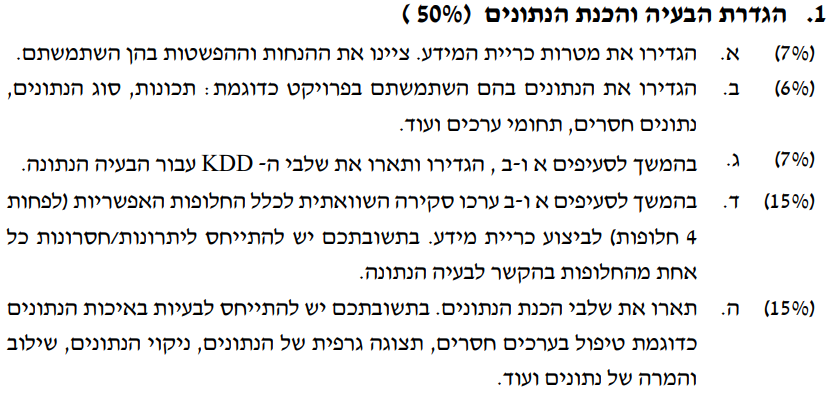

In [41]:
from IPython import display
display.Image("./q1.PNG")

### q 1.A.

The purpose of data mining is to predict the degree of obesity of a subject from the population in the region of Mexico Peru and Colombia using the features from the database given to us.
The feature we want to predict (per record) is the NObeyesdad column (obesity level).
Our database includes 2111 records where each record has seventeen total attributes (including the target for prediction).

In [42]:
df.shape

(2111, 17)

#### The assumptions I used during the project:
1. There is a dependence between the variables given in the database and the level of obesity.
2. According to the article, the data was collected by a reliable source who does not intend to "sabotage" the mining purposes.
3. I tried to assume that the level of obesity cataloged per person is according to the BMI formula as presented in the article but after analyzing the data I discovered that this assumption is incorrect and therefore I will not be able to omit this data from the database.

# q 1.B.
The data obtained (ie the raw database) included 2111 records where each record has 17 attributes (excluding the index attribute, which of course does not constitute an influence factor but is unique to each record.)
In accordance with what is stated in the explanatory article on the data, it is possible to divide the attributes (16) that are not the target column into 3 inclusive parent categories.

##### Eating habits :
1. FAVC - Frequent consumption of foods with high caloric value
2. FCVC - Frequency of vegetable consumption
3. NCP - Number of main meals
4. CAEC - Consumption of food between meals
5. CH20 - daily water intake
6. CALC - Alcohol consumption

##### Influencing habits unrelated to eating / drinking:
1. SCC - Monitoring Calorie Consumption
2. FAF - Frequency of exercise
3. TUE - time in technological devices
4. MTRANS - Type of use of transportation
5. SMOKE- SMOKING

##### Physical characteristics of a subject:
1. GENDER - Gender
2. AGE - Age
3. HEIGHT - Height
4. WEIGHT - Weight
5. family_history_with_overweight - An overweight family history

By using the isnull, any and describe functions we can see that there is no "missing values" in the database and get idea about the distribution of the data.

In [43]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [44]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


## q 1.c.

### KDD stages:

##### 1.	Defining the goals of mining the information :
    א.	The purpose of mining the information is to predict the degree of obesity of a subject from the population of Mexico, Peru and Colombia using the features from the database given to us.
    
#####  2.	Collect and save the data:
    ב.	Selects the set of data on which the process will be executed.
    ג.	The data was obtained from https://www.kaggle.com/mpwolke/obesity-levels-life-style/dataand the explanatory file for the data in the database was obtained from https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
    ד.	The file I loaded intopython  with the help of pandas .
    
##### 3.	Clearing the data :
    ה.	Checks for records with missing values. 
    ו.	Check whether records have unreasonable values
    ז.	Characterization of the values received in A and B and and deciding how to handle them (average, leveling, downloading, downloading the record, etc.) 
    ח.	The resulting database had no missing values (hereinafter, Figure 2) or invalid/unusual and extremist values(detailed below).
    
##### 4.	Perform transformations on the data :
    ט.	Change the way theinformation is saved.
    י.	Change the record values to another shape
    יא.	Creates new properties according to the purpose of mining.
    
#####  5.	Choosingmethods for mining information (such as regression, decision trees, etc.) :
    יב.	Comparing algorithms to solving the problem ( slide 18 as a general guidance for the relevant method of solution.)  
    יג.	Regarding the above problem, it is necessary to examine models for categorization as well as sequential classification
        models because although the groups were given to us in the name of the value they represent is continuous.
    
#####  6.	Discrete andclassify the data:
    יד.	Examining the possibility of discreetization in accordance with the mining goals and algorithms that are being
        considered to be carried out (discreet or continuous data, etc.)
    
#####  7.	Run selected data mining methods:
    טו.	Divides the information into trainingand testaccording to the size of the given database(1/3, k-fold, bootstrap)
    טז.	Creating models by running the algorithms from Section 4 above with their different variations (Gini/ Entropy, etc.) on
        training
    
#####  8.	Analysis of the results:
    יז.	Examining the performance of the algorithms in their various variations.
    יח.	Exam with a fog matrix. 
    יט.	An examination using evaluation metrics. 
    כ.	Examining the simplicity and accuracy of the algorithms. 
    כא.	Examines the effectiveness of the various models and classifiers using theroc curve.
    כב.	Deciding whether the models examined provide a proper result and conclusions can be drawn with them or we will need to
        return to the data reclamation stage / choosing mining methods, etc.
    
#####  9.	Conclusions:
    כג.	A decision on the Warcia model with which the classification of a new reading will be as optimal as possible 
    כד.	In our case the classification of a new reading so that we know how to evaluate the level of obesity of the new reading. 


# q 1.D.

In [45]:
from IPython.display import IFrame, display
filepath = "./models comper.pdf"
IFrame(filepath, width=1000, height=600)

## q 1.E.
##### Clearing the data -
###### Check for missing entries:
    With the help of the info command that can be contained on data frames in pandas it is easy to see that there is no missing data in the database. (See above)
###### Check if there are records with exceptional values:
    Using the describe command that can be contained on data frames in pandas, we get a general look at the database and data in it (standard deviation, mean, quarters, etc. (see above)
    Then, using an Interquartile Range (IQR) scale, we locate the abnormal and extreme values in the continuous features collected and graphically represent the IQR data on a uniform scale with the data distribution graph.

In [46]:
from matplotlib import pyplot as plt
import numpy as np

def count_b_locks(data,colm,axess):
    ax=axess
    ax.hist(data[colm], bins = "auto",color='g')
    plt.grid(True)
    ax.bar_label(ax.containers[0],label_type='edge', fontsize=20,color= "w",padding=-45,rotation=90,fontweight="bold")
    prop = dict(marker='D',markersize= 20, markeredgecolor='black',markerfacecolor='firebrick')
    ax.boxplot(data[colm],vert=False,widths=50,notch=True, bootstrap=10000, patch_artist=True,
               boxprops=dict(alpha=None, facecolor=(1,0,0,0),linewidth="5"),
                flierprops=dict(marker='D',markersize= 20, markeredgecolor='black',markerfacecolor='firebrick'),
              )
    ax.axvline(data[colm].mean(), color = "k", label = "mean",linestyle = 'dashed',linewidth=4)
    ax.axvline(data[colm].median(), color = "r", label = "median",linestyle = 'dashed',linewidth=4)
    ax.legend(fontsize = 30)
    ax.set_title(f"Distribution of values in {colm}",fontsize=35)
    ax.set_xlabel(colm,fontsize = 30)
    ax.tick_params(labelsize=20, rotation=90)
    
    

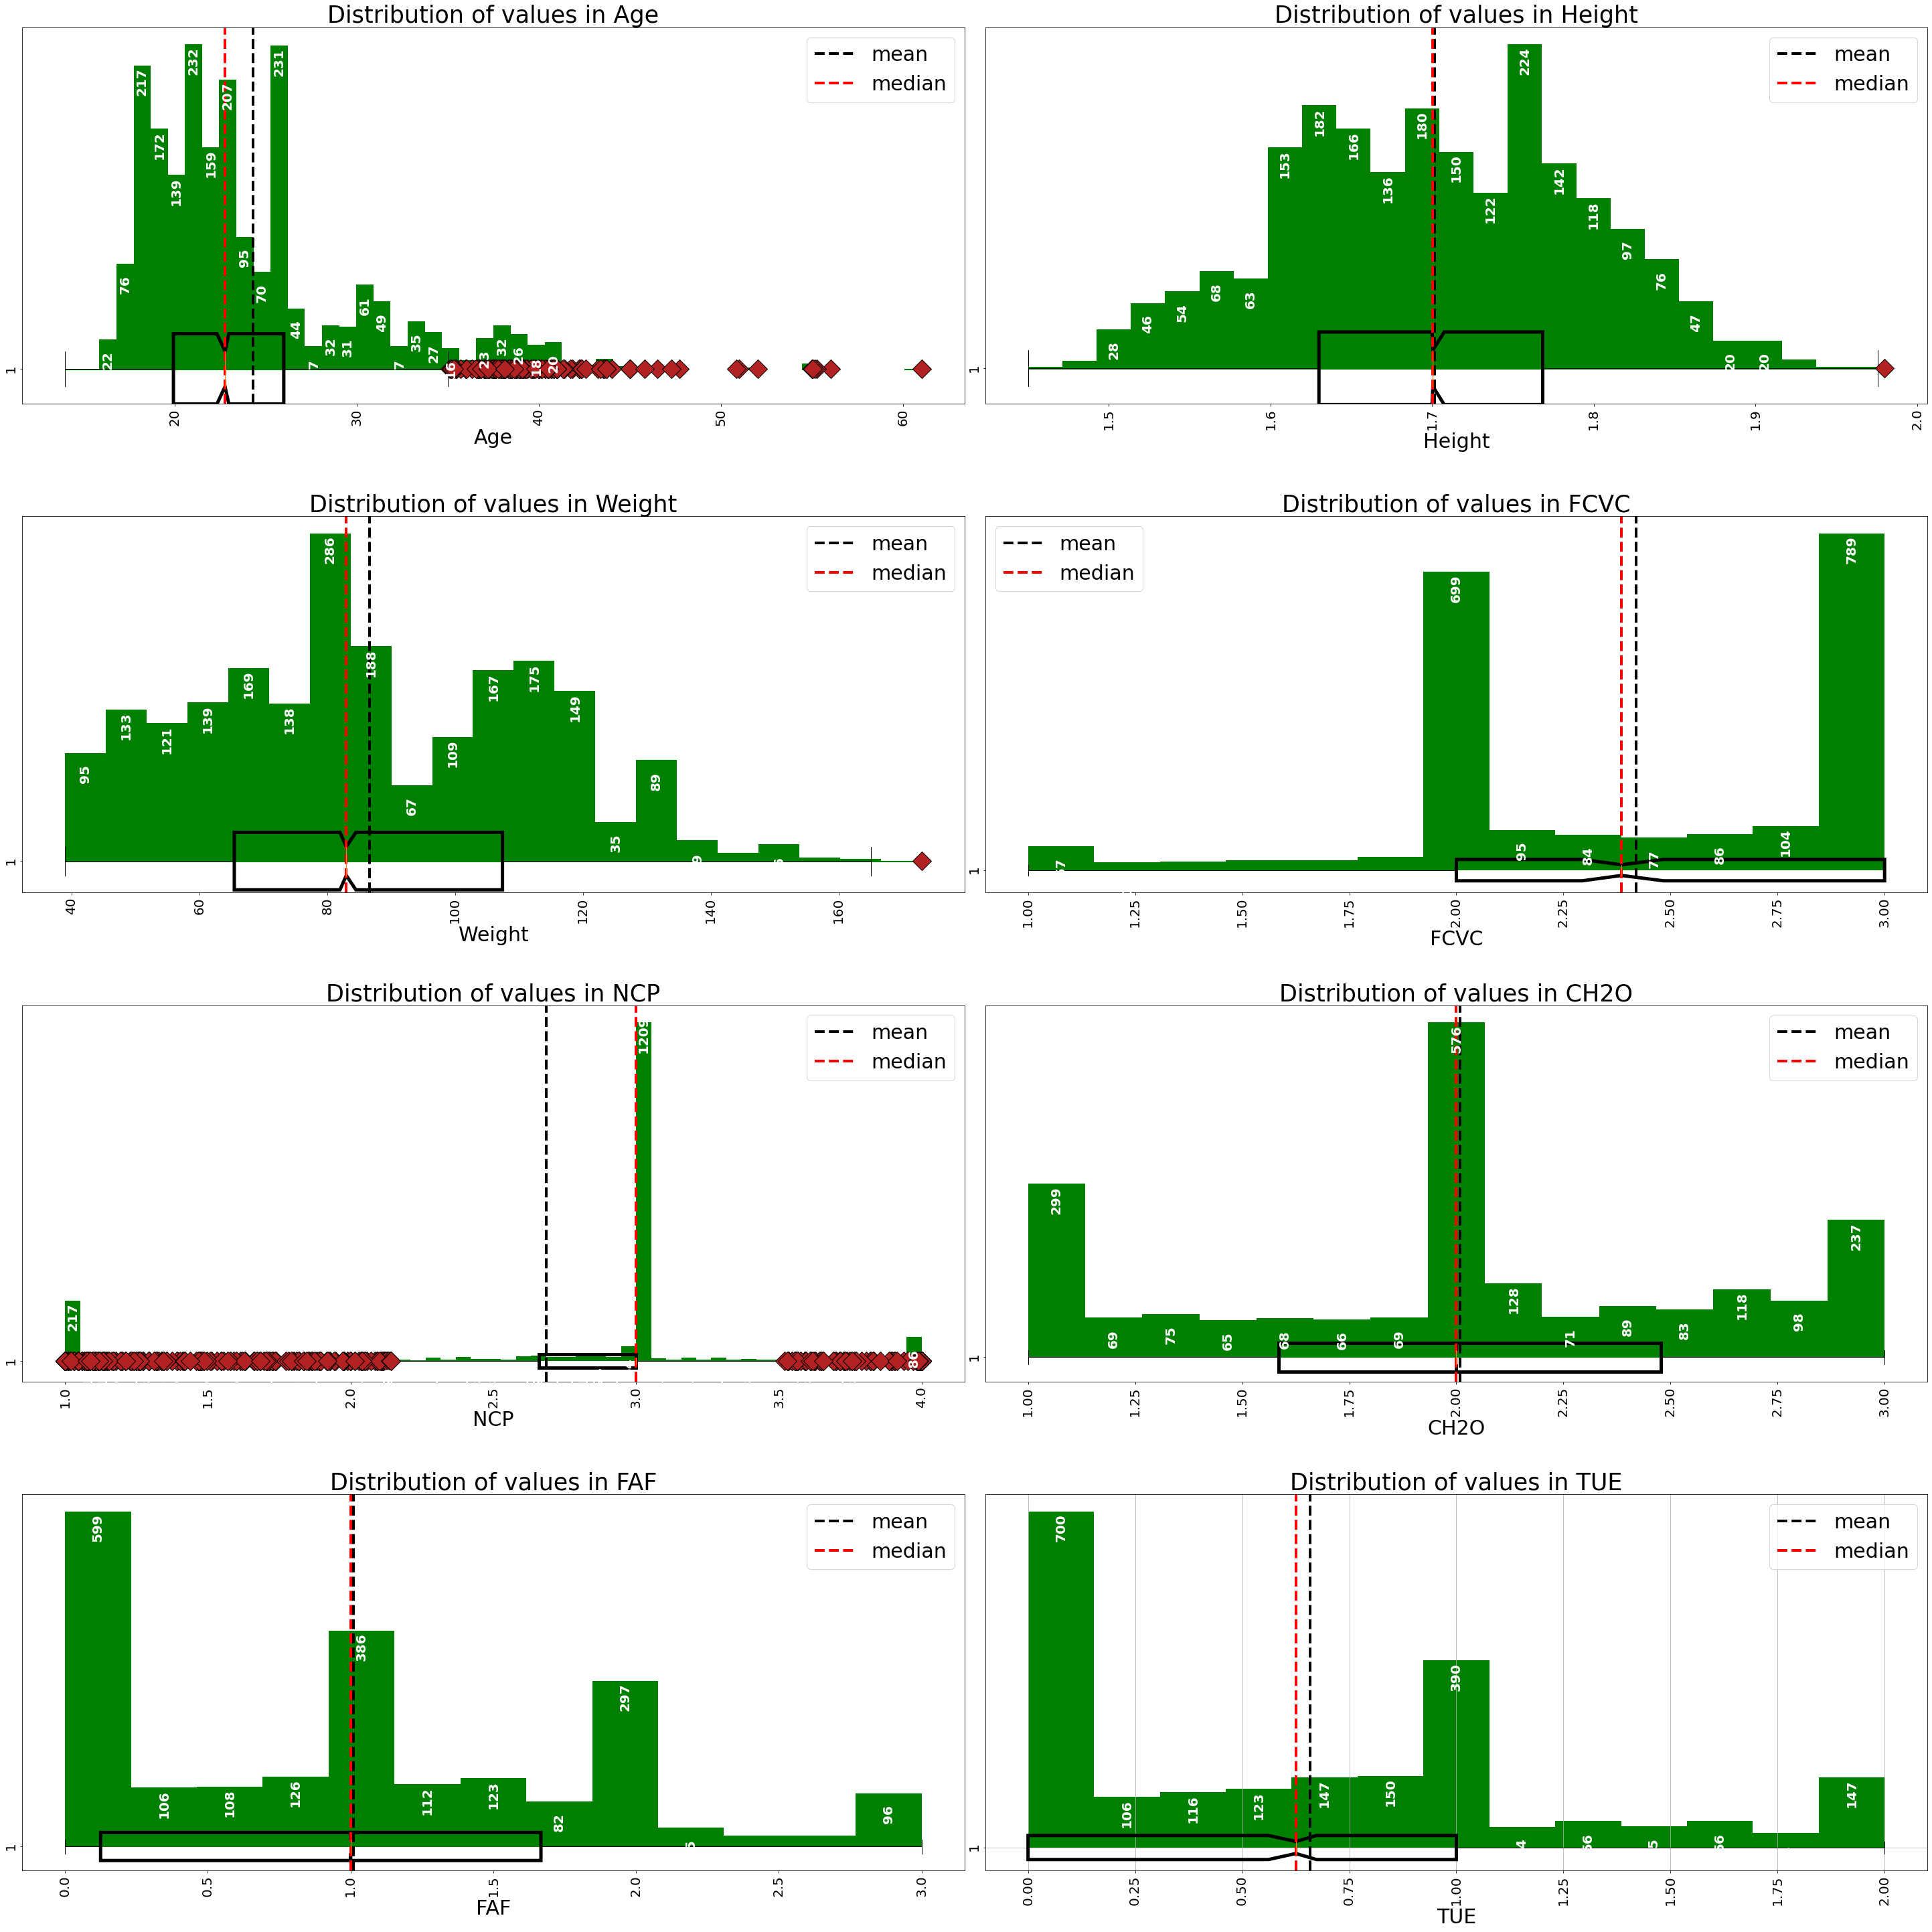

In [47]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (40,40))
idx = 0
axs = axs.flatten()
for k, v in df.items():  
    if df[k].dtype != 'object' and df[k].nunique() != 2 :
        count_b_locks(df,k,axs[idx])
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

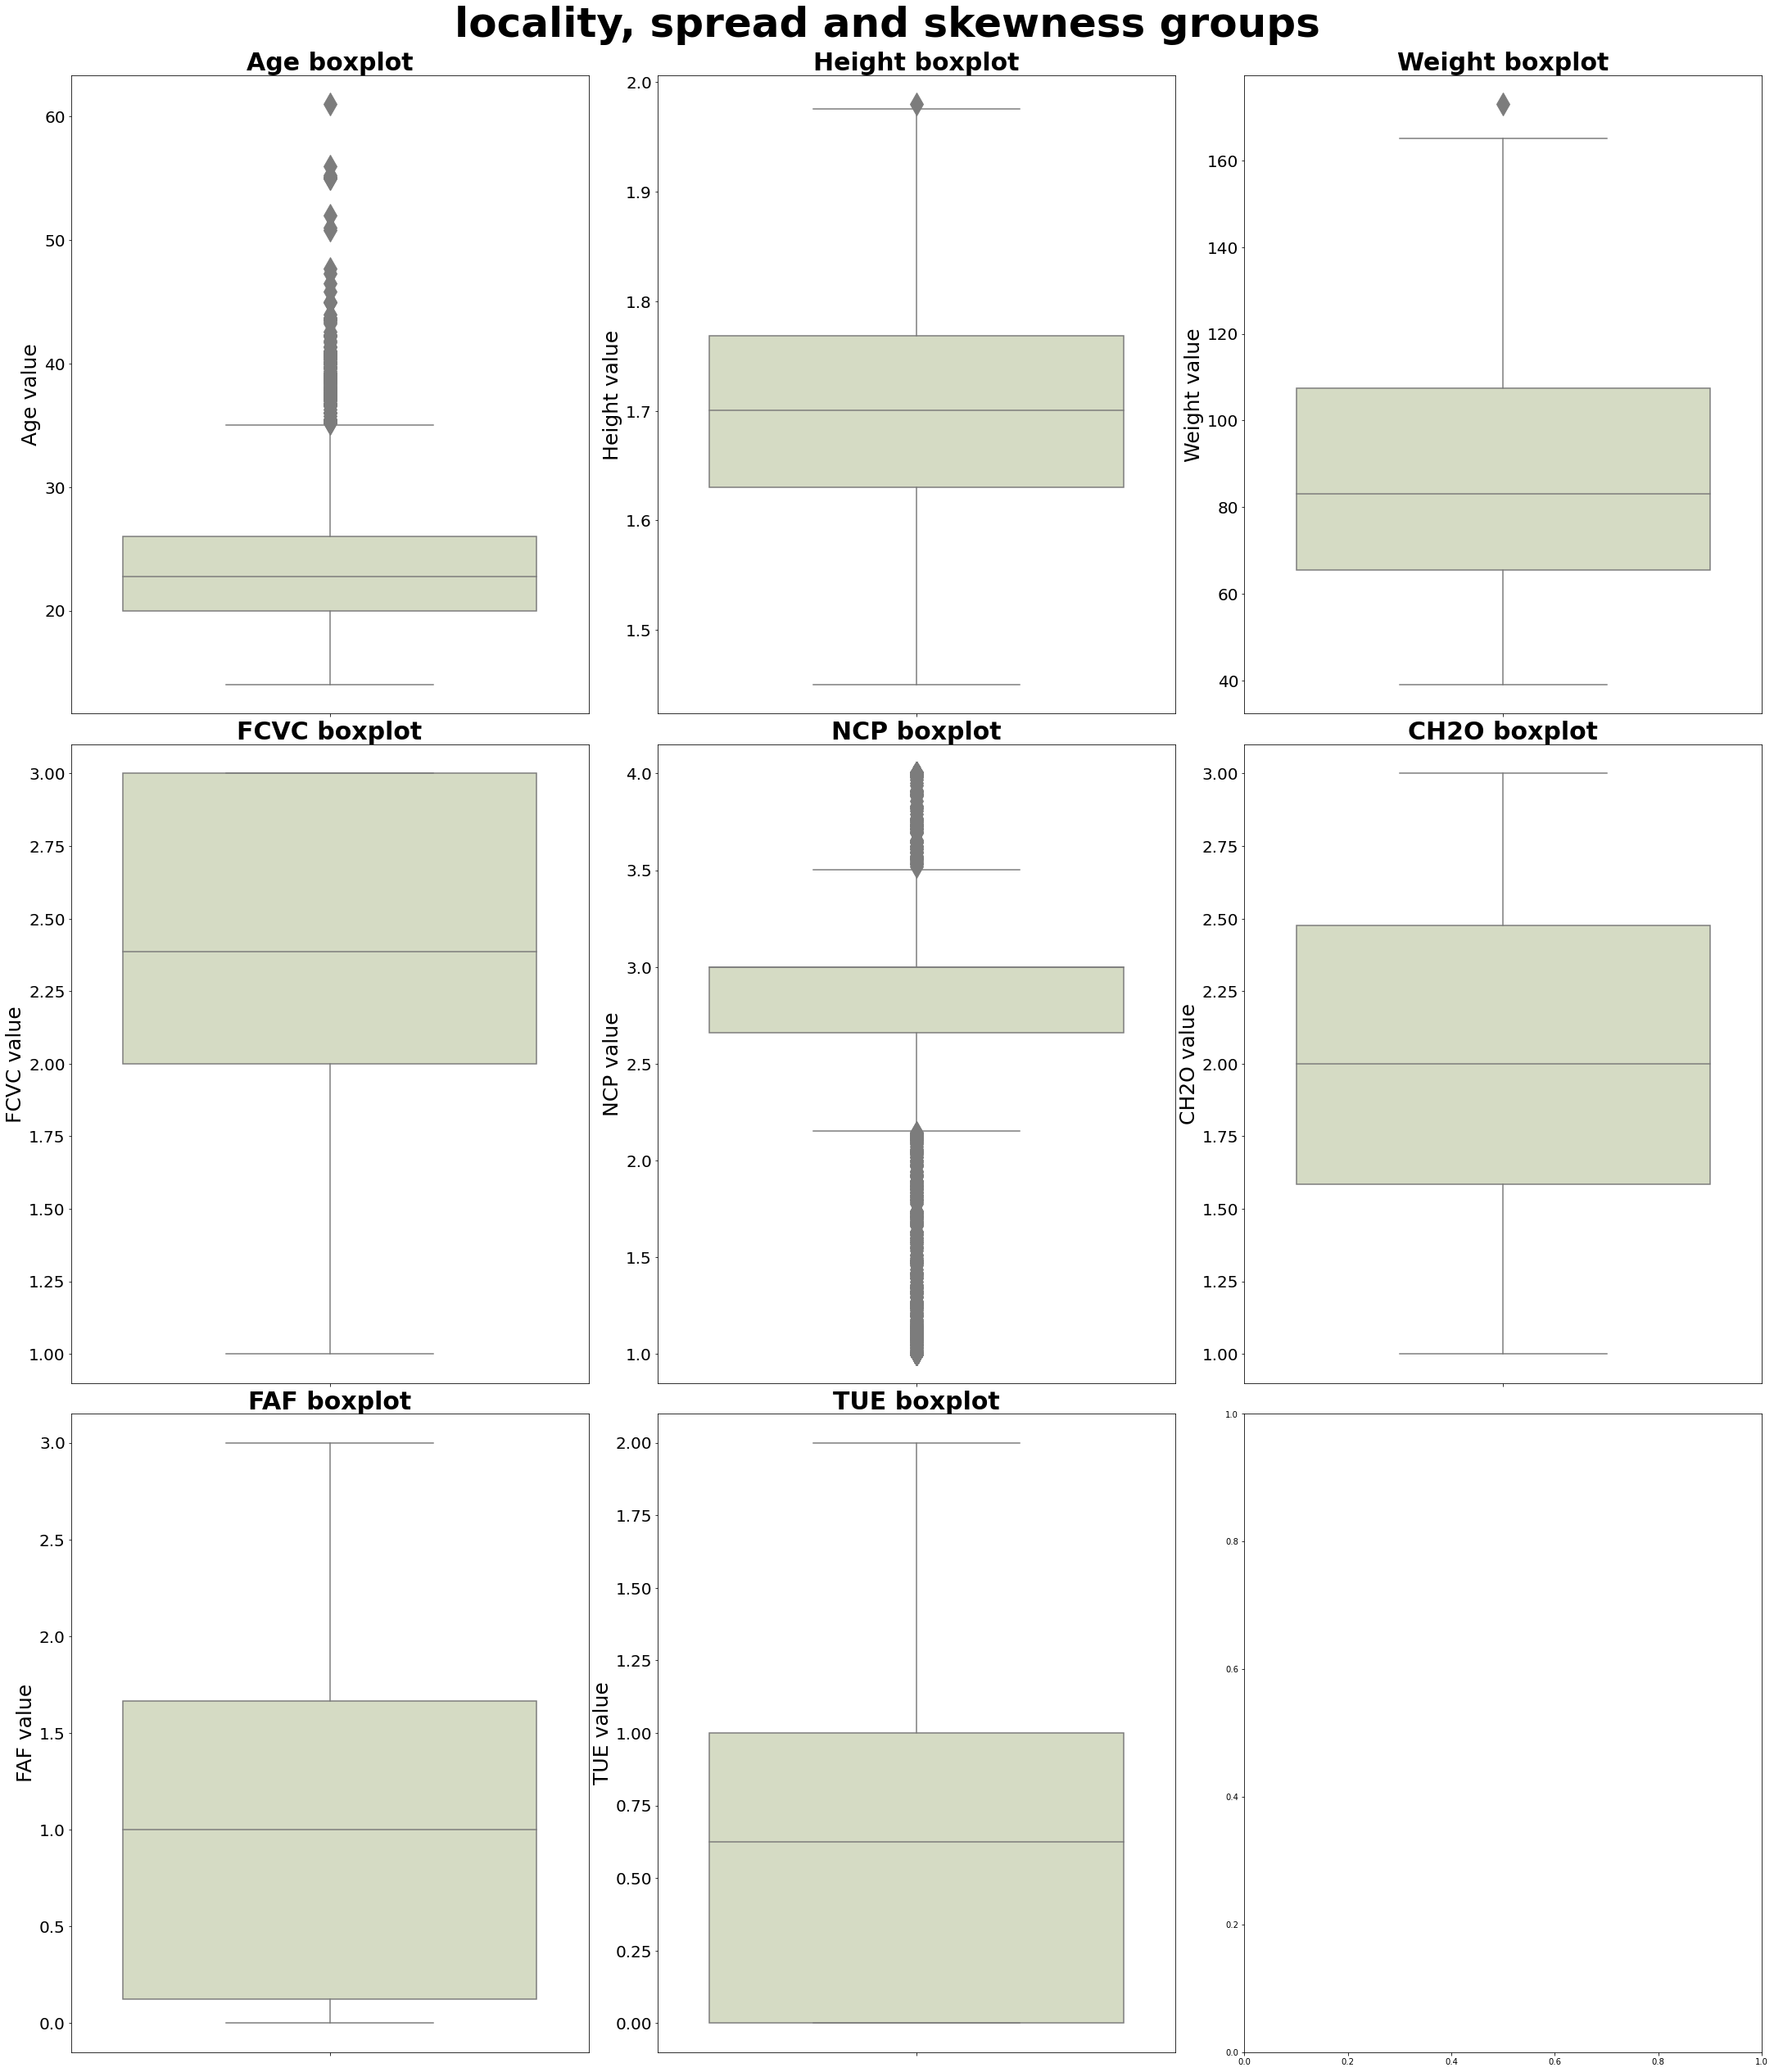

In [48]:
import seaborn as sns

base_plate = sns.cubehelix_palette(start=.5, rot=-.75,)

fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (30,35))
figure_title = "locality, spread and skewness groups" 
plt.suptitle(figure_title, y=1.00,fontsize=50,fontweight="bold")
idx = 0
axs = axs.flatten()
for k, v in df.items():  
    if df[k].dtype != 'object' and df[k].nunique() != 2 :
        b=sns.boxplot(y = k, data = df, ax = axs[idx],palette=base_plate,fliersize=20)
        b.set_ylabel(f"{k} value",fontsize=25)
        b.tick_params(labelsize=20)
        axs[idx].set_title(f"{k} boxplot",fontsize = 30,fontweight="bold")
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 0.5)